In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [4]:
df_min=df[df['4']==1]

In [5]:
df_min.to_csv('iris0_minority_train.csv',index=False)
df_min=pd.read_csv('iris0_minority_train.csv')

In [6]:
df_majority=df[df['4']==0]
df_majority.to_csv('iris0_majority_train.csv',index=False)
df_majority=pd.read_csv('iris0_majority_train.csv')

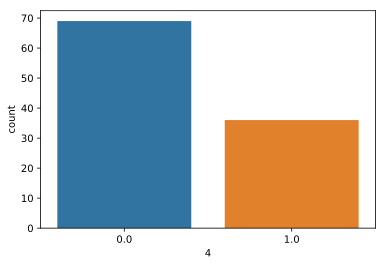

In [7]:
%matplotlib inline
sns.countplot(x='4',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(30, 5, 5)
(30, 5)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(5))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
18/18 [==============================] - 3s 185ms/step - loss: 0.1768
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1721
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1613
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1558
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1503
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1449
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1396
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1293
Epoch 11/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1244
Epoch 12/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1195
Epoch 13/500
18/18 [===============

Epoch 103/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 104/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 105/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 106/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 107/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 108/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 109/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 110/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 111/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 112/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 113/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 114/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 115/500
18

Epoch 203/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 204/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 205/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 206/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 207/500
18/18 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 208/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 209/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 210/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 211/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 212/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 213/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 214/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 215/500
18

Epoch 303/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 304/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 305/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 306/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 307/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 308/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 309/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 310/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 311/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 312/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 313/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 314/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 315/500
18

Epoch 403/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 404/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 405/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 406/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 407/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 408/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 409/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 410/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 411/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 412/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 413/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 414/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 415/500
18

In [14]:
model.save('7-24-2019-iris0-v1.h5')

In [15]:
Xtrain.shape

(18, 5, 5)

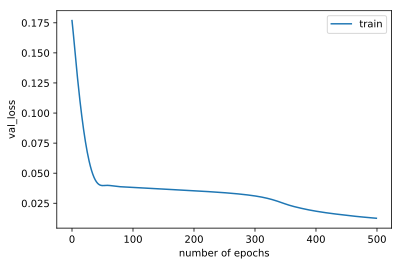

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

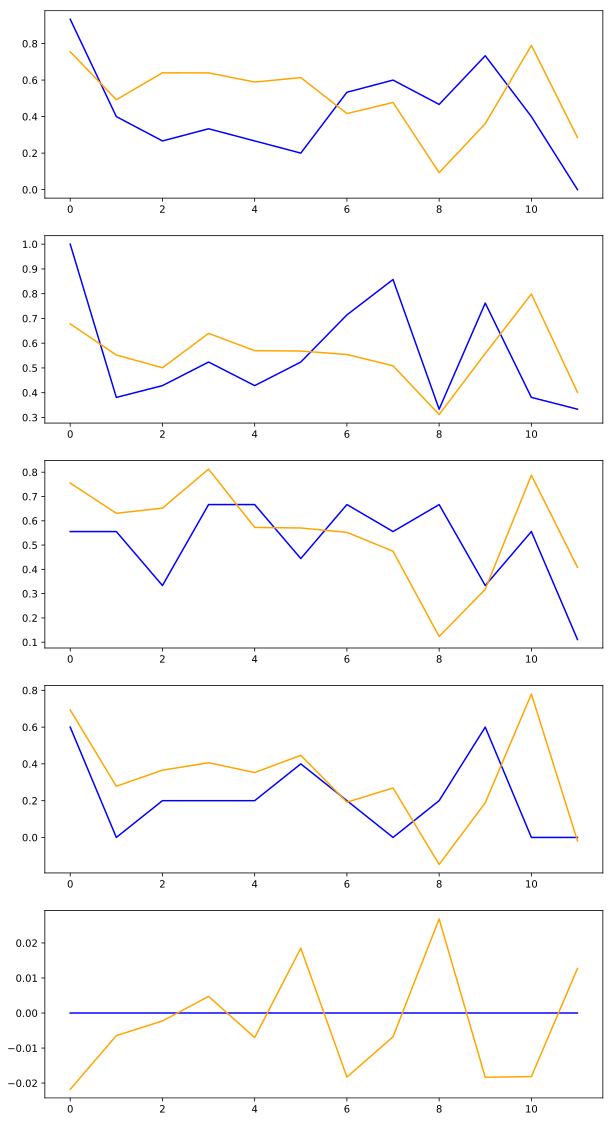

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.75508046,  0.67787004,  0.75514865,  0.6934619 , -0.02180074],
       [ 0.49245912,  0.55206597,  0.6308426 ,  0.2784077 , -0.00645135],
       [ 0.6397568 ,  0.50083506,  0.6521933 ,  0.36584854, -0.00226649],
       [ 0.63933456,  0.6395421 ,  0.81275994,  0.40622613,  0.00474371],
       [ 0.58934265,  0.56977564,  0.5725613 ,  0.35292205, -0.00700993],
       [ 0.61356205,  0.5682124 ,  0.5702071 ,  0.44661713,  0.01850445],
       [ 0.4166468 ,  0.55423737,  0.5522748 ,  0.19198705, -0.01828902],
       [ 0.4773025 ,  0.50879043,  0.47442746,  0.26910537, -0.00678307],
       [ 0.09295363,  0.31162247,  0.12345742, -0.14690785,  0.0268451 ],
       [ 0.3615787 ,  0.5584133 ,  0.31787515,  0.18840538, -0.01835737],
       [ 0.7899072 ,  0.79860145,  0.78739583,  0.77988726, -0.0181395 ],
       [ 0.28544253,  0.40127474,  0.40816057, -0.01874027,  0.0127131 ]],
      dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

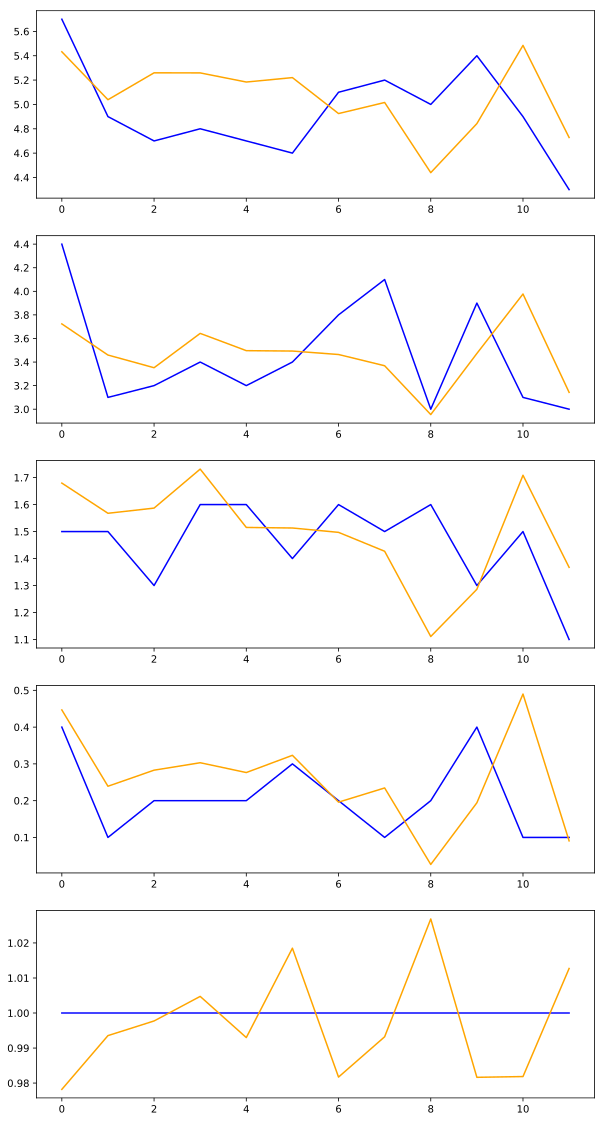

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.75508046,  0.67787004,  0.75514865,  0.6934619 , -0.02180074],
       [ 0.49245912,  0.55206597,  0.6308426 ,  0.2784077 , -0.00645135],
       [ 0.6397568 ,  0.50083506,  0.6521933 ,  0.36584854, -0.00226649],
       [ 0.63933456,  0.6395421 ,  0.81275994,  0.40622613,  0.00474371],
       [ 0.58934265,  0.56977564,  0.5725613 ,  0.35292205, -0.00700993],
       [ 0.61356205,  0.5682124 ,  0.5702071 ,  0.44661713,  0.01850445],
       [ 0.4166468 ,  0.55423737,  0.5522748 ,  0.19198705, -0.01828902],
       [ 0.4773025 ,  0.50879043,  0.47442746,  0.26910537, -0.00678307],
       [ 0.09295363,  0.31162247,  0.12345742, -0.14690785,  0.0268451 ],
       [ 0.3615787 ,  0.5584133 ,  0.31787515,  0.18840538, -0.01835737],
       [ 0.7899072 ,  0.79860145,  0.78739583,  0.77988726, -0.0181395 ],
       [ 0.28544253,  0.40127474,  0.40816057, -0.01874027,  0.0127131 ]],
      dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)